In [ ]:
#Saanvi's path: '/content/drive/MyDrive/Copy of Homestays_Data.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/KDAG Hackathon/Homestays_Data.csv')


In [ ]:
data.head(15)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,33.992563,-117.895997,No.7 Queen Size Cozy Room 舒适大床房,NaN,2,90.0,https://a0.muscache.com/im/pictures/8d2f08ce-b...,91748,1.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

<Axes: >

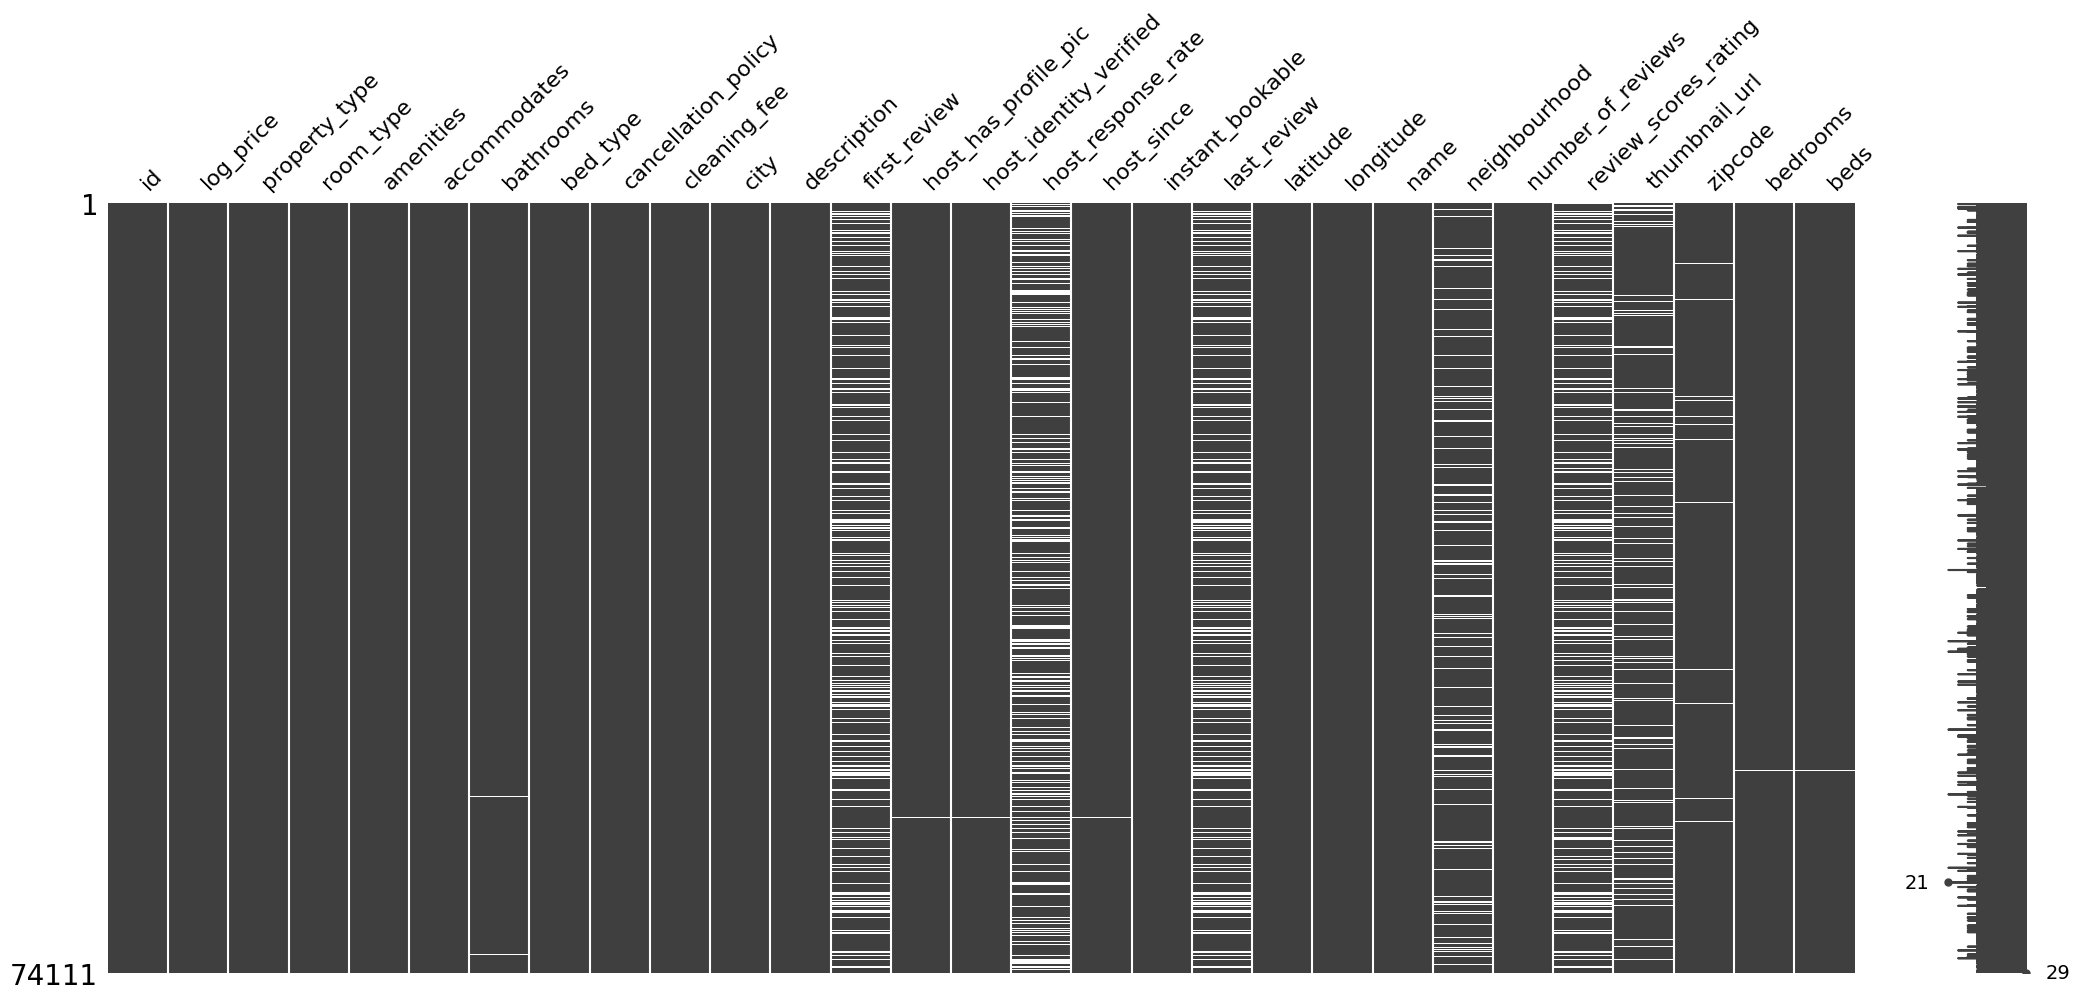

In [ ]:
msno.matrix(data)

In [ ]:
data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [ ]:

# Convert date columns
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

# Drop rows with missing 'host_since' or 'last_review' as they are critical for feature engineering
data = data.dropna(subset=['host_since', 'last_review'])

# Feature Engineering using .loc[]
data.loc[:, 'Host_Tenure'] = (datetime.now() - data['host_since']).dt.days / 365
data.loc[:, 'Amenities_Count'] = data['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
data.loc[:, 'Days_Since_Last_Review'] = (datetime.now() - data['last_review']).dt.days

# Fill missing values in newly created features with 0 where appropriate
data.loc[:, 'Host_Tenure'].fillna(0, inplace=True)
data.loc[:, 'Days_Since_Last_Review'].fillna(0, inplace=True)


<ipython-input-10-36056c3ffc1b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Host_Tenure'] = (datetime.now() - data['host_since']).dt.days / 365
<ipython-input-10-36056c3ffc1b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.loc[:, 'Host_Tenure'].fillna(0, inplace

In [ ]:
# Drop columns that won't be used
data = data.drop(columns=['id', 'name', 'thumbnail_url'])

# Handle categorical data
label_encoder = LabelEncoder()
data['property_type_encoded'] = label_encoder.fit_transform(data['property_type'])
data['room_type_encoded'] = label_encoder.fit_transform(data['room_type'])
data['bed_type_encoded'] = label_encoder.fit_transform(data['bed_type'])
data['cancellation_policy_encoded'] = label_encoder.fit_transform(data['cancellation_policy'])
data['city_encoded'] = label_encoder.fit_transform(data['city'])
data['neighbourhood_encoded'] = label_encoder.fit_transform(data['neighbourhood'])
data['zipcode_encoded'] = label_encoder.fit_transform(data['zipcode'])


In [ ]:
data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Host_Tenure,Amenities_Count,Days_Since_Last_Review,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_encoded,city_encoded,neighbourhood_encoded,zipcode_encoded
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,12.567123,9,3012,0,0,4,2,4,73,102
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,7.331507,15,2580,0,0,4,2,4,241,19
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,7.980822,19,2589,0,0,4,1,4,237,26
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,9.635616,12,2824,0,0,4,1,2,112,202
5,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,...,7.364384,10,2598,0,1,4,2,5,375,626


In [ ]:
data.isnull().sum().sort_values(ascending = False)


,0
host_response_rate,9729
neighbourhood,5103
review_scores_rating,885
zipcode,692
bathrooms,159
bedrooms,71
beds,63
first_review,31
log_price,0
Host_Tenure,0


In [ ]:
df = data[['Amenities_Count','Days_Since_Last_Review','property_type_encoded','room_type_encoded','bed_type_encoded','cancellation_policy_encoded',	'city_encoded',	'neighbourhood_encoded'	,'zipcode_encoded','log_price','bathrooms']]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 58132 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Amenities_Count              58132 non-null  int64  
 1   Days_Since_Last_Review       58132 non-null  int64  
 2   property_type_encoded        58132 non-null  int64  
 3   room_type_encoded            58132 non-null  int64  
 4   bed_type_encoded             58132 non-null  int64  
 5   cancellation_policy_encoded  58132 non-null  int64  
 6   city_encoded                 58132 non-null  int64  
 7   neighbourhood_encoded        58132 non-null  int64  
 8   zipcode_encoded              58132 non-null  int64  
 9   log_price                    58132 non-null  float64
 10  bathrooms                    57973 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 5.3 MB


In [ ]:
df.head()

,Amenities_Count,Days_Since_Last_Review,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_encoded,city_encoded,neighbourhood_encoded,zipcode_encoded,log_price,bathrooms
0,9,3012,0,0,4,2,4,73,102,5.010635,1.0
1,15,2580,0,0,4,2,4,241,19,5.129899,1.0
2,19,2589,0,0,4,1,4,237,26,4.976734,1.0
4,12,2824,0,0,4,1,2,112,202,4.744932,1.0
5,10,2598,0,1,4,2,5,375,626,4.442651,1.0


In [ ]:
!pip install scikit-learn==1.0.2
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.22.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


ImportError: cannot import name 'is_scalar_nan' from 'sklearn.utils' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py)

In [ ]:

    # Initialize the MICE imputer with advanced settings
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),  # Non-linear model for complex relationships
    max_iter=50,                         # Increase iterations for better convergence
    tol=1e-4,                            # Smaller tolerance for more accurate convergence
    n_nearest_features=5,                # Limit to 5 nearest features for computational efficiency
    imputation_order='random',           # Random order of imputation for robustness
    skip_complete=True,                  # Skip columns with no missing values for faster processing
    initial_strategy='median',           # Use median as the initial imputation strategy for better stability
    min_value=0,          # Set logical minimum bound for imputed values (if needed)
    random_state=42                      # Ensure reproducibility
)


# Impute the missing values in the dataset
imputed_data = imputer.fit_transform(df)

# Convert the imputed array back to DataFrame for analysis
imputed_data_df = pd.DataFrame(imputed_data, columns=df.columns)

print(imputed_data_df)


In [ ]:
max1 = df['Amenities_Count'].max()
min1 = df['Amenities_Count'].min()
print(max1,min1)

In [ ]:
df['Amenities_Count'].mean()


In [ ]:
df['Amenities_Count'].median()

In [ ]:
df['Amenities_Count'].mode()


In [ ]:
mx2 = df['Days_Since_Last_Review'].max()
mn2 = df['Days_Since_Last_Review'].min()
print(mx2,mn2)
#df['Days_Since_Last_Review'].mean()
#df['Days_Since_Last_Review'].median()
#df['Days_Since_Last_Review'].mode()

In [ ]:
df['Days_Since_Last_Review'].mean()
#df['Days_Since_Last_Review'].median()
#df['Days_Since_Last_Review'].mode()

In [ ]:
df['Days_Since_Last_Review'].median()

In [ ]:
df['Days_Since_Last_Review'].mode()

In [ ]:
mx3 = df['property_type_encoded'].max()
mn3 = df['property_type_encoded'].min()
print(mx3,mn3)
df['property_type_encoded'].mean()

#

In [ ]:
df['property_type_encoded'].median()


In [ ]:
df['property_type_encoded'].mode()

In [ ]:
mx4  = df['room_type_encoded'].max()
mn4 = df['room_type_encoded'].min()
print(mx4,mn4)
df['room_type_encoded'].mean()

In [ ]:
df['room_type_encoded'].median()

In [ ]:
df['room_type_encoded'].mode()
#

In [ ]:
mx5 = df['room_type_encoded'].max()
mn5 = df['room_type_encoded'].min()
print(mx5,mn5)
df['room_type_encoded'].mean()

In [ ]:
mx6 = df['cancellation_policy_encoded'].max()
mn6 = df['cancellation_policy_encoded'].min()
print(mx6,mn6)
df['cancellation_policy_encoded'].mean()

In [ ]:
mx7 = df['city_encoded'].max()
mn7 = df['city_encoded'].min()
print(mx7,mn7)
df['city_encoded'].mean()

In [ ]:
mx8 = df['neighbourhood_encoded'].max()
mn8 = df['neighbourhood_encoded'].min()
print(mx8,mn8)
df['neighbourhood_encoded'].mean()

In [ ]:
mx9 = df['zipcode_encoded'].max()
mn9 = df['zipcode_encoded'].min()
print(mx9,mn9)
df['zipcode_encoded'].mean()
#

In [ ]:
mx10 = df['log_price'].max()
mn10 = df['log_price'].min()
print(mx10,mn10)
df['log_price'].mean()

In [ ]:
mx11 = df['bathrooms'].max()
mn11 = df['bathrooms'].min()
print(mx11,mn11)
df['bathrooms'].mean()
#

In [ ]:
df['Days_Since_Last_Review'] = df['Days_Since_Last_Review'].clip(lower=2592, upper=3000)
df['Amenities_Count'] = df['Amenities_Count'].clip(lower=0, upper=20)
df['bathrooms'] = df['bathrooms'].clip(lower=0, upper=2)

df['neighbourhood_encoded'] = df['neighbourhood_encoded'].clip(lower=0, upper=350)
df['city_encoded'] = df['city_encoded'].clip(lower=0, upper=3.5)
df['zipcode_encoded'] = df['zipcode_encoded'].clip(lower=0, upper=300)
df['room_type_encoded'] = df['room_type_encoded'].clip(lower=0, upper=5)
df['property_type_encoded'] = df['property_type_encoded'].clip(lower=0, upper=10)
df['cancellation_policy_encoded'] = df['cancellation_policy_encoded'].clip(lower=0, upper=2)

In [ ]:
df.head()

In [ ]:
a = df['Amenities_Count'].max()
print(a)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.scatterplot(data, x='Amenities_Count', y='log_price', color='blue')
plt.title('Scatter Plot-Amenities_Count')
plt.xlabel('Amenities_Count')
plt.ylabel('Log_price')

In [ ]:
sns.scatterplot(data, x='neighbourhood', y='log_price', color='red')
plt.title('Scatter Plot-neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Log_price')

In [ ]:
sns.histplot(data['neighbourhood'], bins=5, kde=True)

# Add titles and labels
plt.title('Histogram of Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [ ]:
sns.histplot(data['log_price'], bins=20, kde=True, color = 'darkblue')

# Add titles and labels
plt.title('Histogram of Log_Price')
plt.xlabel('Log_price')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [ ]:
sns.histplot(data['Days_Since_Last_Review'], bins=20, kde=True, color = 'blue')

# Add titles and labels
plt.title('Histogram of Days_Since_Last_Review')
plt.xlabel('Days_Since_Last_Review')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [ ]:
sns.histplot(data['accommodates'], bins=20, kde=True, color = 'red')

# Add titles and labels
plt.title('Histogram of accommodates')
plt.xlabel('accommodates')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [ ]:
sns.histplot(data['review_scores_rating'], bins=20, kde=True, color = 'green')

# Add titles and labels
plt.title('Histogram of review_scores_rating')
plt.xlabel('review_scores_rating')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
numerical_columns = ['log_price', 'accommodates', 'bathrooms',
                      'latitude', 'longitude', 'number_of_reviews',
                      'review_scores_rating', 'bedrooms', 'beds']

df_numerical = data[numerical_columns]
sns.pairplot(df_numerical, hue='log_price', palette='Set1')
plt.show()